In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#### = is : for dictionaries

In [2]:
endpoint = 'https://data.nashville.gov/resource/fuaa-r5cm.json'
##we could have added ?year=2016 to the end of the endpoint to filter but not best way

In [3]:
params ={'year':'2016', 'query_text':'fire'}
##This is how we filter, by making a dictionary of key value pairs

### 1.) Make an API request that returns the months where "fire" was searched in 2016. Which month had the most searches? 
#### August with 47

In [4]:
response = requests.get(endpoint, params=params)

In [5]:
response

<Response [200]>

In [6]:
result = response.json()
##These first 5 steps should always be the same (just different url)

In [7]:
result
##To view result of request

[{'month_name': 'January',
  'year': '2016',
  'query_count': '19',
  'query_text': 'fire'},
 {'month_name': 'February',
  'year': '2016',
  'query_count': '35',
  'query_text': 'fire'},
 {'month_name': 'March',
  'year': '2016',
  'query_count': '32',
  'query_text': 'fire'},
 {'month_name': 'April',
  'year': '2016',
  'query_count': '26',
  'query_text': 'fire'},
 {'month_name': 'May',
  'year': '2016',
  'query_count': '24',
  'query_text': 'fire'},
 {'month_name': 'June',
  'year': '2016',
  'query_count': '31',
  'query_text': 'fire'},
 {'month_name': 'July',
  'year': '2016',
  'query_count': '24',
  'query_text': 'fire'},
 {'month_name': 'August',
  'year': '2016',
  'query_count': '47',
  'query_text': 'fire'},
 {'month_name': 'September',
  'year': '2016',
  'query_count': '36',
  'query_text': 'fire'},
 {'month_name': 'October',
  'year': '2016',
  'query_count': '38',
  'query_text': 'fire'},
 {'month_name': 'November',
  'year': '2016',
  'query_count': '32',
  'query_text

In [8]:
result1 = response.json()

In [9]:
result1_df=pd.DataFrame(result1)
result1_df

,month_name,year,query_count,query_text
0,January,2016,19,fire
1,February,2016,35,fire
2,March,2016,32,fire
3,April,2016,26,fire
4,May,2016,24,fire
5,June,2016,31,fire
6,July,2016,24,fire
7,August,2016,47,fire
8,September,2016,36,fire
9,October,2016,38,fire


In [10]:
result1_df.sort_values(by='query_count', ascending=False)
##Sort number of fires, we had to do it this way d/t query count being a str not int

,month_name,year,query_count,query_text
7,August,2016,47,fire
9,October,2016,38,fire
11,December,2016,38,fire
8,September,2016,36,fire
1,February,2016,35,fire
2,March,2016,32,fire
10,November,2016,32,fire
5,June,2016,31,fire
3,April,2016,26,fire
4,May,2016,24,fire


### 2.) Make an API request that returns all the times a query was run more than 100 times in a month. How many times did this occur? 
#### 1262

In [11]:
params ={'$where': 'query_count>100', '$limit' : '50000'}
##We have to do this weird format because query is a str not an int or something
##We changed the limit becasue the limit is 1000 automatically

In [12]:
endpoint2 = 'https://data.nashville.gov/resource/fuaa-r5cm.json'
##You could also change the endpoint by adding ?$limit=50000 to the end of the .json
## but you would need to change this to endpoint 2 or something to not mess with future results

In [13]:
response = requests.get(endpoint2, params=params)
response

<Response [200]>

In [14]:
result2 = response.json()

In [15]:
result2_df=pd.DataFrame(result2)
result2_df

,month_name,year,query_count,query_text,month
0,March,2014,101,permits,NaN
1,January,2015,101,criminal court clerk,NaN
2,September,2015,101,codes,NaN
3,March,2016,101,police,NaN
4,March,2016,101,civil service,NaN
...,...,...,...,...,...
1257,September,2018,750,annual enrollment,NaN
1258,October,2018,816,annual enrollment,NaN
1259,January,2019,2646,Nashville,1
1260,September,2019,5327,directory,9


In [16]:
len(result2_df)

1262

### 3.) Make another API request that returns all the times "codes" was searched more than 100 times in a month. How many times did this occur?
#### 56 Times

In [17]:
endpoint = 'https://data.nashville.gov/resource/fuaa-r5cm.json'


In [18]:
params ={'query_text':'codes','$where': 'query_count>100'}

In [19]:
response = requests.get(endpoint, params=params)

In [20]:
response

<Response [200]>

In [21]:
result3 = response.json()

In [22]:
result3_df=pd.DataFrame(result3)
result3_df

,month_name,year,query_count,query_text,month
0,September,2015,101,codes,NaN
1,April,2021,102,codes,4
2,August,2016,104,codes,NaN
3,November,2020,104,codes,11
4,December,2017,106,codes,NaN
5,May,2016,107,codes,NaN
6,April,2016,111,codes,NaN
7,July,2021,114,codes,7
8,January,2017,115,codes,NaN
9,May,2021,115,codes,5


In [23]:
result3_df.shape

(56, 5)

### 4a.) Make an API request that returns the entire Top 500 Monthly Searches dataset. 

In [24]:
endpoint = 'https://data.nashville.gov/resource/fuaa-r5cm.json'

In [25]:
params ={'$limit' : '50000'}

In [26]:
response = requests.get(endpoint, params=params)

In [27]:
response

<Response [200]>

In [28]:
results_all = response.json()
results_all_df=pd.DataFrame(results_all)
results_all_df

,month_name,year,query_count,query_text,month
0,January,2014,223,ebid,NaN
1,January,2014,112,property maps,NaN
2,January,2014,97,maps,NaN
3,January,2014,90,property tax,NaN
4,January,2014,76,jobs,NaN
...,...,...,...,...,...
43672,July,2021,8,sign ordinance,7
43673,July,2021,8,snap,7
43674,July,2021,8,small business,7
43675,July,2021,8,water department,7


### 4b.) Make a chart that shows the number of times "maps" was searched in a month across the entire time frame.

In [29]:
maps_df=results_all_df[results_all_df['query_text'] == 'maps']

In [30]:
maps_df

,month_name,year,query_count,query_text,month
2,January,2014,97,maps,NaN
503,February,2014,140,maps,NaN
1005,March,2014,144,maps,NaN
1503,April,2014,152,maps,NaN
2003,May,2014,119,maps,NaN
...,...,...,...,...,...
39196,November,2020,86,maps,11
39688,December,2020,113,maps,12
41188,March,2021,132,maps,3
41683,April,2021,148,maps,4


<function matplotlib.pyplot.show(close=None, block=None)>

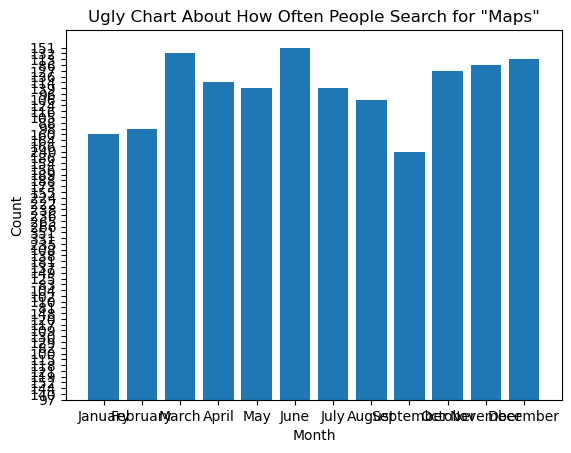

In [31]:
plt.bar(maps_df.month_name, maps_df.query_count)
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Ugly Chart About How Often People Search for "Maps"')
plt.show
##This chart lumps all the years together but keeps the months so March 2014 through 2021 are all 
##grouped together, that's a problem for tomorrow...